In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from scipy import stats
import os
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# 读取数据
data_folder = os.walk(r"data")  
for path,dir_list,file_list in data_folder:  
    for file_name in file_list:  
        path_now = os.path.join(path, file_name)
        if file_name == "beijing_all_20150101.csv" :
            data_all = pd.read_csv(path_now)
        elif file_name == "beijing_all_20161229.csv" :
            data_now = pd.read_csv(path_now)
            data_all = pd.concat([data_all, data_now], axis=0)
            break
        elif file_name[:11] == "beijing_all" :
            data_now = pd.read_csv(path_now)
            data_all = pd.concat([data_all, data_now], axis=0)
#         print(path_now)

In [3]:
# data_folder = os.walk(r"data") 
# for path,dir_list,file_list in data_folder:  
#     for file_name in file_list:  
#         path_now = os.path.join(path, file_name)
#         if file_name == "beijing_extra_20150101.csv" :
#             data_extra = pd.read_csv(path_now)
#             print(path_now)
#         elif file_name == "beijing_extra_20161229.csv" :
#             data_now = pd.read_csv(path_now)
#             data_extra = pd.concat([data_extra, data_now], axis=0)
#             print(path_now)
#             break
#         elif file_name[:13] == "beijing_extra" :
#             data_now = pd.read_csv(path_now)
#             data_extra = pd.concat([data_extra, data_now], axis=0)
#             print(path_now)

In [4]:
# 数据预处理
data_all_pm25 = data_all[data_all['type']=='PM2.5'].iloc[:,3:]
# data_extra_so2 = data_extra[data_extra['type']=='SO2'].iloc[:,3:]

In [5]:
# print(data_all_pm25['东四'][data_all_pm25['东四'].isnull()])

In [6]:
data_all_pm25_filled = data_all_pm25.fillna(method='ffill')
data_all_pm25_filled = data_all_pm25_filled.fillna(method='bfill')

In [7]:
df_train = data_all_pm25_filled
na_count = df_train.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df_train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data

,count,ratio
东四环,0,0.0
植物园,0,0.0
亦庄,0,0.0
大兴,0,0.0
房山,0,0.0
古城,0,0.0
云岗,0,0.0
丰台花园,0,0.0
北部新区,0,0.0
顺义,0,0.0


In [33]:
data_all_pm25_filled

,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,丰台花园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,3.0,7.7,5.7,3.0,13.7,12.5,6.9,7.2,3.0,3.1,...,5.3,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5
5,5.2,3.7,7.9,3.0,11.4,8.1,3.4,6.8,4.6,4.9,...,6.2,13.3,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0
10,4.4,11.2,3.8,3.9,13.6,7.4,3.0,7.6,7.7,4.8,...,5.8,8.3,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7
15,3.0,3.5,4.9,4.2,10.1,7.5,4.5,5.8,9.2,4.0,...,3.0,7.9,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8
20,4.0,6.1,3.0,4.4,12.9,11.5,4.4,6.4,3.3,6.2,...,3.0,4.0,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,10.0,8.0,4.0,13.0,9.0,11.0,12.0,25.0,6.0,8.0,...,7.0,15.0,16.0,23.0,208.0,10.0,11.0,14.0,10.0,15.0
30,8.0,5.0,10.0,3.0,8.0,8.0,13.0,26.0,8.0,13.0,...,5.0,15.0,15.0,29.0,189.0,8.0,11.0,16.0,10.0,11.0
35,15.0,10.0,8.0,12.0,12.0,8.0,14.0,22.0,17.0,12.0,...,8.0,15.0,13.0,38.0,192.0,6.0,13.0,14.0,14.0,17.0
40,18.0,12.0,15.0,12.0,12.0,11.0,14.0,37.0,14.0,19.0,...,7.0,15.0,19.0,35.0,186.0,15.0,12.0,26.0,15.0,13.0


Text(0, 0.5, 'Probability Density')

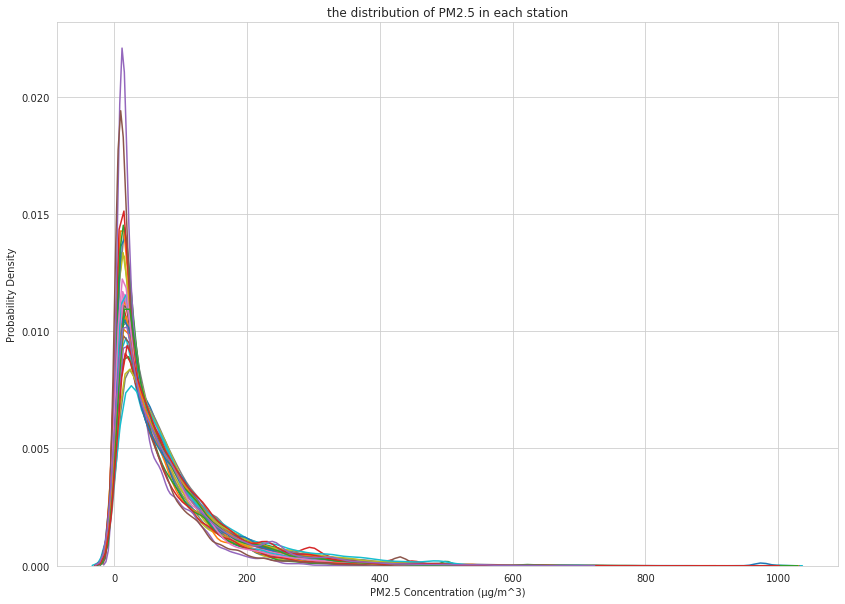

In [24]:
fig, ax= plt.subplots(1,1,figsize = (14, 10))
sns.set_style('whitegrid')
for i in range(35):
    sns.distplot(data_all_pm25_filled.iloc[:,i],hist = False) 
ax.set_title('the distribution of PM2.5 in each station')
ax.set_xlabel("PM2.5 Concentration (μg/m^3)")
ax.set_ylabel("Probability Density")
# fig.savefig('sns_style_origin.jpg', dpi=100, bbox_inches='tight')

Text(0, 0.5, 'Probability Density')

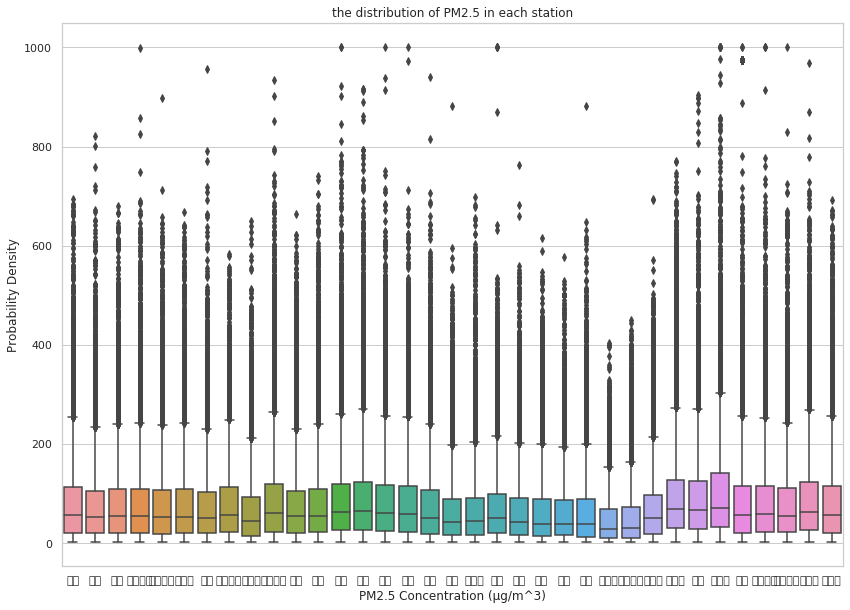

In [28]:
fig, ax= plt.subplots(1,1,figsize = (14, 10))
sns.set_style('whitegrid')
sns.boxplot(data=data_all_pm25_filled.iloc[:,0:35])
ax.set_title('the distribution of PM2.5 in each station')
ax.set_xlabel("PM2.5 Concentration (μg/m^3)")
ax.set_ylabel("Probability Density")

In [14]:
# fig, ax1= plt.subplots(figsize = (14, 10))
# sns.set_style('whitegrid')
# sns.boxplot(data = data_all_pm25_filled[['东四','天坛']])

# sns.catplot(kind="box", data=data_all_pm25_filled.iloc[:,0:35])
# ax.set_titles('the distribution of PM2.5 in each station')
# ax.set_xlabel("PM2.5 Concentration (μg/m^3)")
# ax.set_ylabel("Probability Density")

In [20]:
data_all_pm25_filled

,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,丰台花园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,3.0,7.7,5.7,3.0,13.7,12.5,6.9,7.2,3.0,3.1,...,5.3,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5
5,5.2,3.7,7.9,3.0,11.4,8.1,3.4,6.8,4.6,4.9,...,6.2,13.3,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0
10,4.4,11.2,3.8,3.9,13.6,7.4,3.0,7.6,7.7,4.8,...,5.8,8.3,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7
15,3.0,3.5,4.9,4.2,10.1,7.5,4.5,5.8,9.2,4.0,...,3.0,7.9,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8
20,4.0,6.1,3.0,4.4,12.9,11.5,4.4,6.4,3.3,6.2,...,3.0,4.0,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,10.0,8.0,4.0,13.0,9.0,11.0,12.0,25.0,6.0,8.0,...,7.0,15.0,16.0,23.0,208.0,10.0,11.0,14.0,10.0,15.0
30,8.0,5.0,10.0,3.0,8.0,8.0,13.0,26.0,8.0,13.0,...,5.0,15.0,15.0,29.0,189.0,8.0,11.0,16.0,10.0,11.0
35,15.0,10.0,8.0,12.0,12.0,8.0,14.0,22.0,17.0,12.0,...,8.0,15.0,13.0,38.0,192.0,6.0,13.0,14.0,14.0,17.0
40,18.0,12.0,15.0,12.0,12.0,11.0,14.0,37.0,14.0,19.0,...,7.0,15.0,19.0,35.0,186.0,15.0,12.0,26.0,15.0,13.0
